Hey! Welcome to my Kaggle Project on World Happiness. If you're here from Linkedin, I'm glad the link worked. If you're here from Kaggle, thanks for stopping by. Today we are going to focus on pulling insights and correlations from the dataset. We are also going to make a solid effort to make the visuals good to look at. Lets get started with loading in some libraries. 

In [1]:
#Loading Libraries
import matplotlib.pyplot as plt # For Plotting
import pandas as pd # Pandas for Data Processing, the data will be in csv format
import os # For directory structure access
import numpy as np # For Linear Algebra
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

Next lets make sure our dataset is within the directory

In [2]:
print(os.listdir('../input'))

['world-happiness']


Now that we've made sure the datasets are within our directory lets do some exploration of the data.

In [3]:
# Reading the 2015.csv file
nRowsRead = 1000
df1 = pd.read_csv('/kaggle/input/world-happiness/2015.csv', delimiter=',', nrows=nRowsRead)
df1.dataframeName = '2015.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 158 rows and 12 columns


Great! We can see that there is 158 rows and 12 columns within the 2015 csv, lets check the rest of the files.

In [4]:
nRowsRead = 1000

df2 = pd.read_csv('/kaggle/input/world-happiness/2016.csv', delimiter=',', nrows=nRowsRead)
df3 = pd.read_csv('/kaggle/input/world-happiness/2017.csv', delimiter=',', nrows=nRowsRead)
df4 = pd.read_csv('/kaggle/input/world-happiness/2018.csv', delimiter=',', nrows=nRowsRead)
df5 = pd.read_csv('/kaggle/input/world-happiness/2019.csv', delimiter=',', nrows=nRowsRead)

df2.dataframeName = '2016.csv'
df3.dataframeName = '2017.csv'
df4.dataframeName = '2018.csv'
df5.dataframeName = '2019.csv'

dataframes = [df1, df2, df3, df4, df5]

for i, df in enumerate(dataframes, start=1):
    nRow, nCol = df.shape
    print(f'DataFrame {i}: There are {nRow} rows and {nCol} columns')

DataFrame 1: There are 158 rows and 12 columns
DataFrame 2: There are 157 rows and 13 columns
DataFrame 3: There are 155 rows and 12 columns
DataFrame 4: There are 156 rows and 9 columns
DataFrame 5: There are 156 rows and 9 columns


Next we check the columns of the dataframes so we can merge them with confidence.

In [5]:
print(df1.head(1), df2.head(1), df3.head(1), df4.head(1), df5.head(1))

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
0                   0.94143  0.66557                        0.41978   

   Generosity  Dystopia Residual  
0     0.29678            2.51738      Country          Region  Happiness Rank  Happiness Score  \
0  Denmark  Western Europe               1            7.526   

   Lower Confidence Interval  Upper Confidence Interval  \
0                       7.46                      7.592   

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.44178  1.16374                   0.79504  0.57941   

   Trust (Government Corruption)  Generosity  Dystopia Residual  
0                        0.44453     0.36171            2.73939     Country 

It looks like for df1, df2 and df3 the column we will merge on is 'Country'.

In [6]:
df3.rename(columns={'Happiness.Rank': 'Happiness Rank', 'Happiness.Score': 'Happiness Score'}, inplace=True)
df4.rename(columns={'Country or region': 'Country'}, inplace=True)
df5.rename(columns={'Country or region': 'Country'}, inplace=True)

In [7]:
df1['Year'] = 2015  # Add Year column to DataFrame 1
df2['Year'] = 2016  # Add Year column to DataFrame 2
df3['Year'] = 2017  # Add Year column to DataFrame 3
df4['Year'] = 2018  # Add Year column to DataFrame 4
df5['Year'] = 2019  # Add Year column to DataFrame 5

Next lets merge them

In [8]:
from functools import reduce

dataframes = [df1, df2, df3, df4, df5]

# merge function with dynamic suffixes
def custom_merge(df_list):
    # Starts with the first dataframe as the base
    base_df = df_list[0]
    # Iterates over the remaining dataframes
    for i, df in enumerate(df_list[1:], start=2):  # Start with 2 because the first dataframe is already in base_df
        # Define dynamic suffixes based on the iteration
        suffixes = ('', f'_{i}')
        # Merge while applying unique suffixes for each dataframe
        base_df = pd.merge(base_df, df, on='Country', how='inner', suffixes=suffixes)
    return base_df

# Perform the merge with unique suffixes
merged_df = custom_merge(dataframes)

# Display the first few rows of the merged DataFrame
print(merged_df.head())

       Country          Region  Happiness Rank  Happiness Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard Error  Economy (GDP per Capita)   Family  \
0         0.03411                   1.39651  1.34951   
1         0.04884                   1.30232  1.40223   
2         0.03328                   1.32548  1.36058   
3         0.03880                   1.45900  1.33095   
4         0.03553                   1.32629  1.32261   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  ...  \
0                   0.94143  0.66557                        0.41978  ...   
1                   0.94784  0.62877                        0.14145  ...   
2                   0.87464  0.6

We have successfully merged the dataframes and added a year column to keep track of the data.

**Comparative Analysis
To compare the average happiness score by region for 2019:**

                            Region   Score_5
0        Australia and New Zealand  7.267500
5                    North America  7.085000
9                   Western Europe  6.898400
3      Latin America and Caribbean  5.942550
1       Central and Eastern Europe  5.571786
2                     Eastern Asia  5.564250
6                Southeastern Asia  5.333375
4  Middle East and Northern Africa  5.237000
7                    Southern Asia  4.526857
8               Sub-Saharan Africa  4.380323


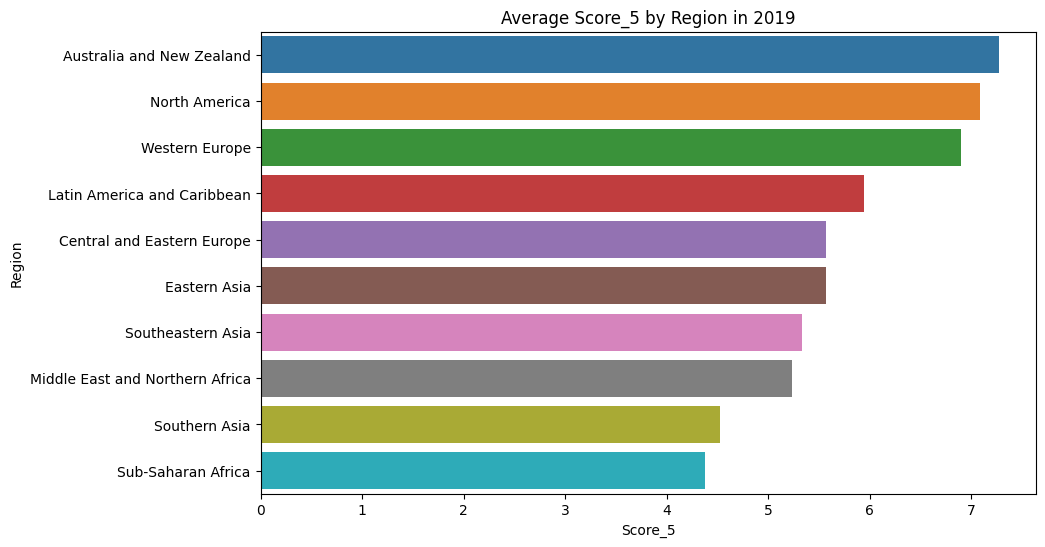

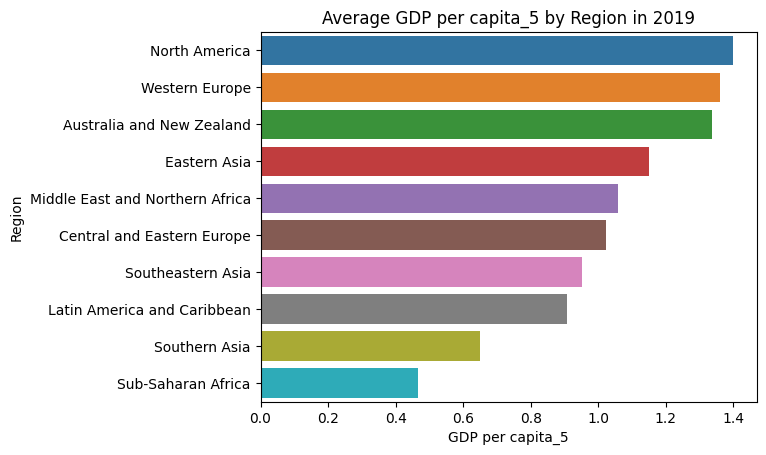

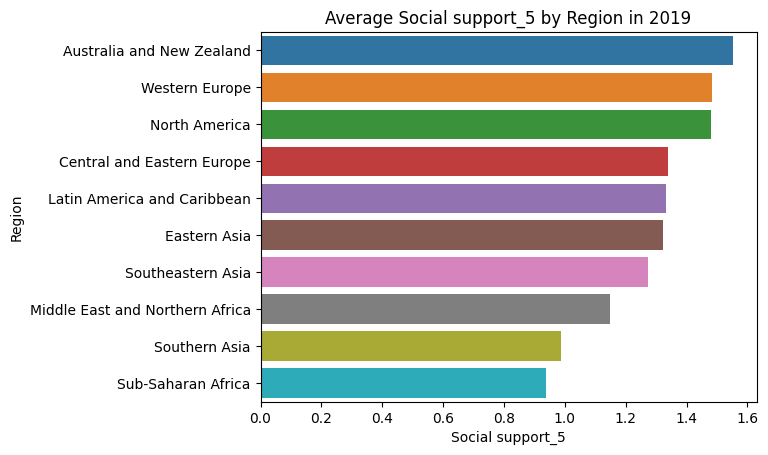

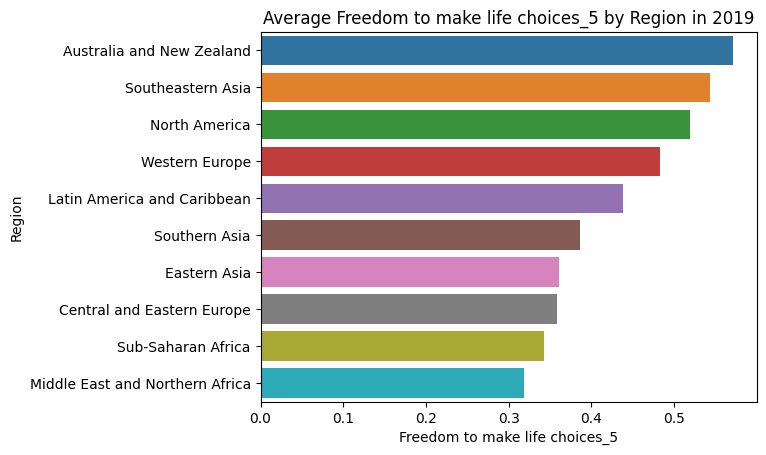

In [9]:
average_happiness_by_region_2019 = merged_df.groupby('Region')['Score_5'].mean().reset_index()
average_happiness_by_region_2019_sorted = average_happiness_by_region_2019.sort_values(by='Score_5', ascending=False)
print(average_happiness_by_region_2019_sorted)

import matplotlib.pyplot as plt
import seaborn as sns


metrics = ['Score_5', 'GDP per capita_5', 'Social support_5', 'Freedom to make life choices_5']
region_metrics_mean = merged_df.groupby('Region')[metrics].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
for metric in metrics:
    sns.barplot(x=metric, y='Region', data=region_metrics_mean.sort_values(metric, ascending=False))
    plt.title(f'Average {metric} by Region in 2019')
    plt.xlabel(metric)
    plt.ylabel('Region')
    plt.show()

**Trend Analysis
To examine how happiness scores change over the years:**

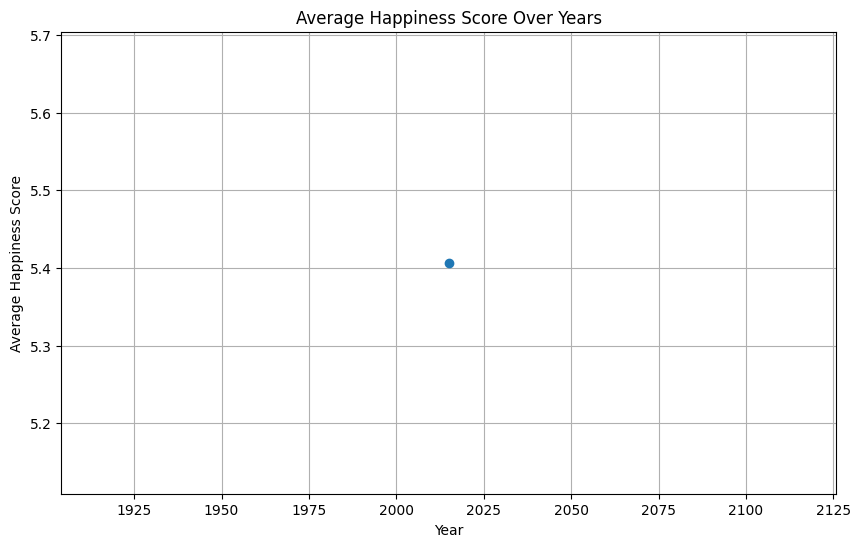

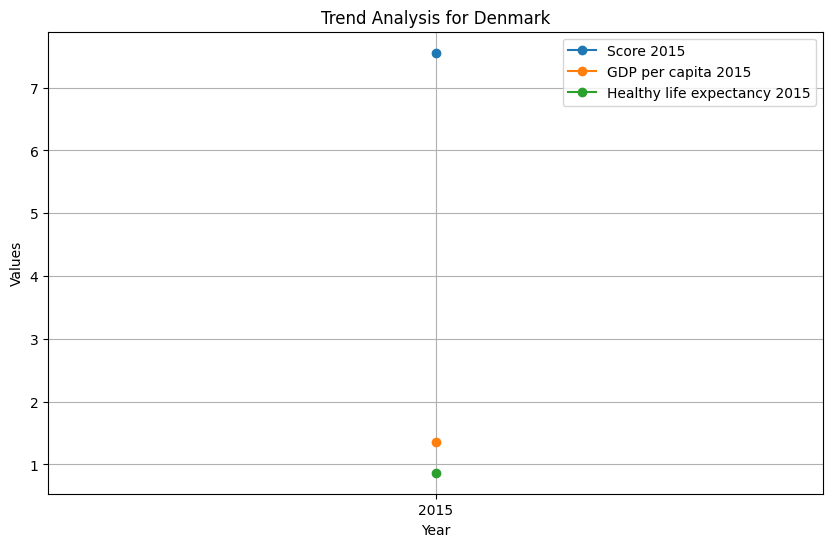

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# You would have different columns for Happiness Score for each year, like 'Happiness Score_5' for 2019
# Create a new DataFrame to calculate the average happiness score by year
years = ['2015', '2016_2', '2017_3', '2018_4', '2019_5']
average_happiness_by_year = {}

for year in years:
    # Extract the last character to determine the year
    year_number = year[-1] if year != '2015' else ''
    column_name = f'Happiness Score{year_number}'
    if column_name in merged_df.columns:
        # The column exists, so calculate the mean for this year
        average_happiness_by_year[year.strip('_')] = merged_df[column_name].mean()

# Convert the dictionary to a DataFrame for plotting
average_happiness_df = pd.DataFrame(list(average_happiness_by_year.items()), columns=['Year', 'Average Happiness Score'])
average_happiness_df['Year'] = average_happiness_df['Year'].astype(int)
average_happiness_df = average_happiness_df.sort_values('Year')

# Plotting the average happiness score by year
plt.figure(figsize=(10, 6))
plt.plot(average_happiness_df['Year'], average_happiness_df['Average Happiness Score'], marker='o')
plt.title('Average Happiness Score Over Years')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.grid(True)
plt.show()

country = 'Denmark'
metrics = ['Score', 'GDP per capita', 'Healthy life expectancy']

# Setting up the plot for Denmark's specific metrics over years
plt.figure(figsize=(10, 6))

for metric_base in metrics:
    # The metric names have suffixes, similar to the 'Happiness Score' earlier
    for year in years:
        year_number = year[-1] if year != '2015' else ''
        # Construct the metric name with the appropriate suffix
        metric = f'{metric_base}{year_number}'
        if metric in merged_df.columns:
            # Filter the DataFrame for the selected country and not-null values in 'Year' and the metric
            data = merged_df[(merged_df['Country'] == country) & merged_df[metric].notnull()]
            # Plotting the trend for the current metric
            plt.plot(data[f'Year{year_number}'], data[metric], marker='o', label=f'{metric_base} {year.strip("_")}')

plt.title(f'Trend Analysis for {country}')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.xticks(average_happiness_df['Year'].unique())
plt.grid(True)
plt.show()


In [11]:
def find_countries_with_multiple_years(df):
    # List of suffixes that represent different years in your DataFrame's column names
    year_suffixes = ['_1', '_2', '_3', '_4', '_5']  # Add or remove suffixes as per your DataFrame

    # Dictionary to hold countries with their respective years of data
    country_years_data = {}

    # Check each country for entries in the year columns
    for country in df['Country'].unique():
        years_data = []
        # Check for each year suffix
        for suffix in year_suffixes:
            # Check if any of the columns with the current suffix have non-null data
            if df[df['Country'] == country].filter(like=suffix).notnull().values.any():
                years_data.append(suffix.strip('_'))
        # If there's more than one year of data, add it to the dictionary
        if len(years_data) > 1:
            country_years_data[country] = years_data

    return country_years_data

# To use this function, call it with your DataFrame:
countries_with_data_over_years = find_countries_with_multiple_years(merged_df)
print(countries_with_data_over_years)

{'Switzerland': ['2', '3', '4', '5'], 'Iceland': ['2', '3', '4', '5'], 'Denmark': ['2', '3', '4', '5'], 'Norway': ['2', '3', '4', '5'], 'Canada': ['2', '3', '4', '5'], 'Finland': ['2', '3', '4', '5'], 'Netherlands': ['2', '3', '4', '5'], 'Sweden': ['2', '3', '4', '5'], 'New Zealand': ['2', '3', '4', '5'], 'Australia': ['2', '3', '4', '5'], 'Israel': ['2', '3', '4', '5'], 'Costa Rica': ['2', '3', '4', '5'], 'Austria': ['2', '3', '4', '5'], 'Mexico': ['2', '3', '4', '5'], 'United States': ['2', '3', '4', '5'], 'Brazil': ['2', '3', '4', '5'], 'Luxembourg': ['2', '3', '4', '5'], 'Ireland': ['2', '3', '4', '5'], 'Belgium': ['2', '3', '4', '5'], 'United Arab Emirates': ['2', '3', '4', '5'], 'United Kingdom': ['2', '3', '4', '5'], 'Venezuela': ['2', '3', '4', '5'], 'Singapore': ['2', '3', '4', '5'], 'Panama': ['2', '3', '4', '5'], 'Germany': ['2', '3', '4', '5'], 'Chile': ['2', '3', '4', '5'], 'Qatar': ['2', '3', '4', '5'], 'France': ['2', '3', '4', '5'], 'Argentina': ['2', '3', '4', '5'], 'C

**Correlation Analysis
To investigate the relationships between GDP per capita and happiness scores for 2019:**

                  GDP per capita_5   Score_5
GDP per capita_5          1.000000  0.789601
Score_5                   0.789601  1.000000


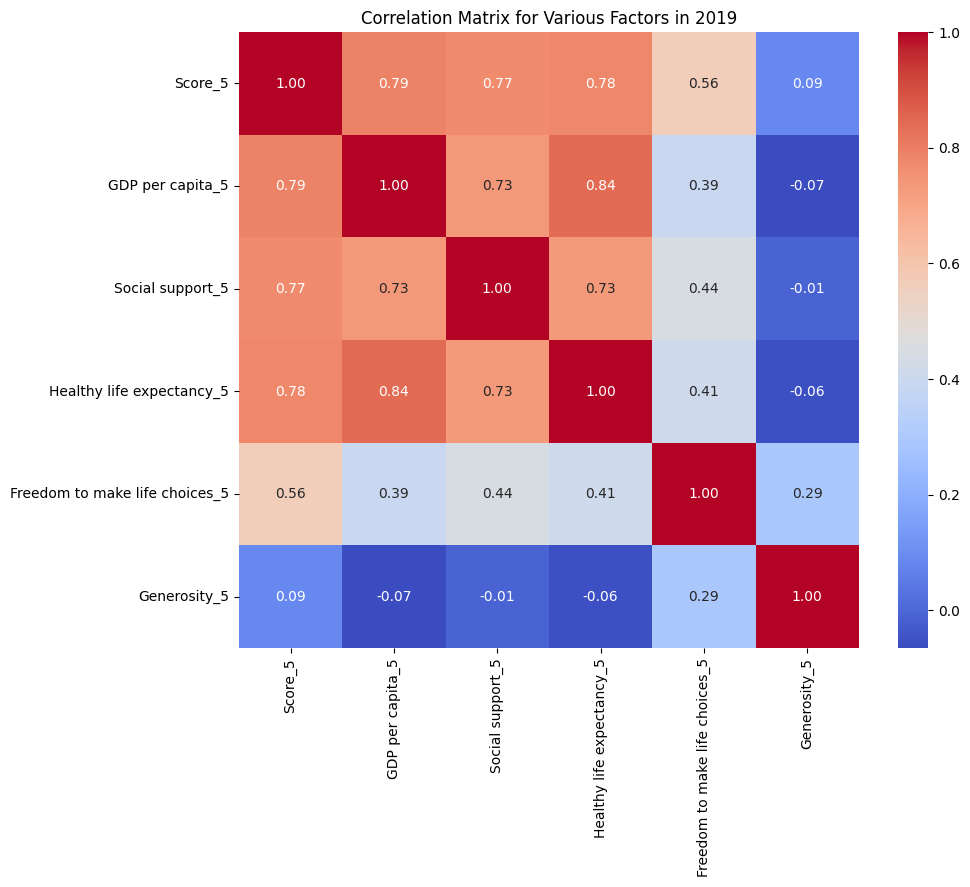

In [12]:
correlation_analysis = merged_df[['GDP per capita_5', 'Score_5']].corr()
print(correlation_analysis)

factors = ['Score_5', 'GDP per capita_5', 'Social support_5', 'Healthy life expectancy_5', 'Freedom to make life choices_5', 'Generosity_5']
correlation_matrix = merged_df[factors].corr()

# Heatmap visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Various Factors in 2019')
plt.show()

**Predictive Modeling
a simple predictive model using Linear Regression to predict happiness scores based on GDP per capita for 2019:**

Mean Squared Error: 0.4053094221141041
Coefficient of Determination (R^2): 0.6698669408880185
Mean Absolute Error: 0.4716996551724146
R^2 Score: 0.7283257961804834


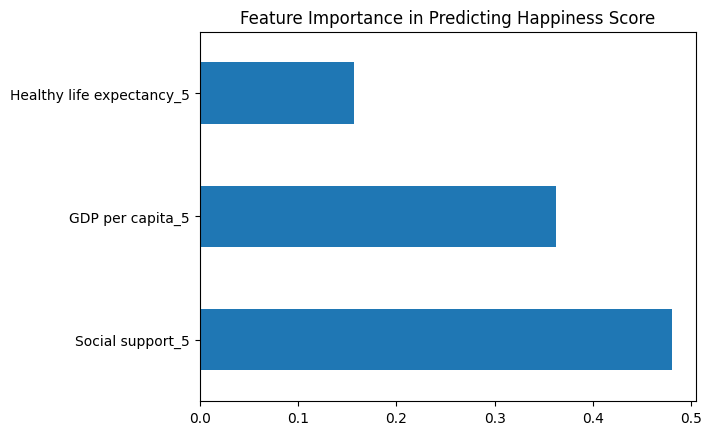

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = merged_df[['GDP per capita_5']]  # Predictor
y = merged_df['Score_5']  # Response

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict happiness scores
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Coefficient of Determination (R^2):', r2_score(y_test, y_pred))


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Preparing data with multiple predictors
X = merged_df[['GDP per capita_5', 'Social support_5', 'Healthy life expectancy_5']]  # Multiple predictors
y = merged_df['Score_5']

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model initialization and training
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Prediction and evaluation
y_pred_rf = model_rf.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_rf))
print('R^2 Score:', r2_score(y_test, y_pred_rf))

# Feature Importance
feature_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
feature_importances.nlargest(len(X.columns)).plot(kind='barh')
plt.title('Feature Importance in Predicting Happiness Score')
plt.show()